# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.18 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [3]:
from dqn_agent import Agent
from collections import deque
from unityagents import UnityEnvironment
import matplotlib.pyplot as plt
import numpy as np
import torch



# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 1.0


When finished, you can close the environment.

### 4. Training

The following section includes training two models:
- A Vanilla DQN model using the code implemeneted in the DQN coding exercise, with a change in the weight initialization to be initialized using xavier initialization. It uses both replay buffer and target network.
- A Dueling DQN model using a modified network model which adapts Dueling DQN network code, it used also with both replay buffer and target network.


In [5]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995,model="Vanilla"):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    count=0
    for i_episode in range(1, n_episodes+1):
        #state = env.reset()
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.vector_observations[0]            # get the current state

        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            count+=1
            if count == 100:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
                if(model=="Vanilla"):
                    torch.save(agent.qnetwork_local.state_dict(), 'vanilla_checkpoint.pth')
                elif(model=="Duel"):
                    torch.save(agent.qnetwork_local.state_dict(), 'Duel_checkpoint.pth')
                break
        elif count>0:
            count=0
    return scores


Episode 100	Average Score: 0.31
Episode 200	Average Score: 4.02
Episode 300	Average Score: 7.85
Episode 400	Average Score: 10.09
Episode 500	Average Score: 12.65
Episode 600	Average Score: 13.74
Episode 620	Average Score: 14.02
Environment solved in 520 episodes!	Average Score: 14.02


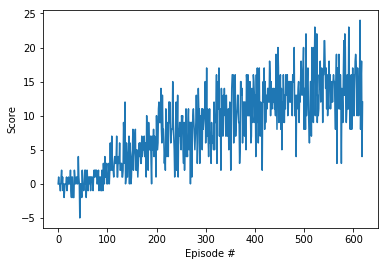

CPU times: user 5min 24s, sys: 26.9 s, total: 5min 51s
Wall time: 8min 38s


In [6]:
%%time

#agent= Agent(state_size=37, action_size=4, seed=199,buffer_size=int(1e5), batch_size=64,
#                gamma=0.99, tau=1e-3, lr=5e-4, update_every=4 )
agent= Agent(state_size=37, action_size=4, seed=42, model="Vanilla")
scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('vanilla_scores.png', bbox_inches='tight')
plt.show()

Episode 100	Average Score: 0.80
Episode 200	Average Score: 4.59
Episode 300	Average Score: 8.10
Episode 400	Average Score: 9.82
Episode 500	Average Score: 11.90
Episode 600	Average Score: 13.17
Episode 676	Average Score: 13.87
Environment solved in 576 episodes!	Average Score: 13.87


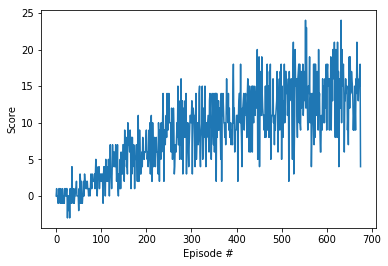

CPU times: user 6min 55s, sys: 36.1 s, total: 7min 31s
Wall time: 10min 31s


In [6]:
%%time
agent= Agent(state_size=37, action_size=4, seed=42, model="Duel")
scores = dqn(model="Duel")

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('Duel_scores.png', bbox_inches='tight')
plt.show()

### 5. Testing

The following section includes testing the two saved models:
- A Vanilla DQN model.
- A Dueling DQN model.

Both are tested for 5 runs and the average score is calculated.

In [18]:
# load train model to act
agent = Agent(state_size = 37, action_size = 4, seed = 42, model="Vanilla")
agent.qnetwork_local.load_state_dict(torch.load('vanilla_checkpoint.pth', map_location='cpu'))
print(agent.qnetwork_local)

QNetwork(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)


In [12]:
avg_score = 0 
count =0
while count<5:
    env_info = env.reset(train_mode=False)[brain_name] 
    state = env_info.vector_observations[0]
    current_score=0   
    while True:
        action = agent.act(state)                      
        env_info = env.step(action)[brain_name]        
        next_state = env_info.vector_observations[0]   
        reward = env_info.rewards[0]                   
        done = env_info.local_done[0]   
        avg_score+=reward
        current_score += reward                                
        state = next_state                             
        if done:     
            print("Score : {}".format(current_score))
            break
    count+=1
    
print("Average Score for 5 runs: {}".format(avg_score/count))

Score : 18.0
Score : 6.0
Score : 8.0
Score : 3.0
Score : 14.0
Average Score for 5 runs: 9.8


In [19]:
# load train model to act
agent = Agent(state_size = 37, action_size = 4, seed = 42, model="Duel")
agent.qnetwork_local.load_state_dict(torch.load('Duel_checkpoint.pth', map_location='cpu'))
print(agent.qnetwork_local)

DuelQNetwork(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (Value): Linear(in_features=64, out_features=1, bias=True)
  (Advantage): Linear(in_features=64, out_features=4, bias=True)
)


In [9]:
avg_score = 0    
count =0
while count<5:
    env_info = env.reset(train_mode=False)[brain_name] 
    state = env_info.vector_observations[0]    
    current_score=0
    while True:
        action = agent.act(state)                      
        env_info = env.step(action)[brain_name]        
        next_state = env_info.vector_observations[0]   
        reward = env_info.rewards[0]                   
        done = env_info.local_done[0]                  
        avg_score += reward     
        current_score+= reward
        state = next_state                             
        if done: 
            print("Score : {}".format(current_score))
            break
    count+=1  
    
print("Average Score for 5 runs: {}".format(avg_score/count))

Score : 2.0
Score : 4.0
Score : 14.0
Score : 13.0
Score : 9.0
Average Score for 5 runs: 8.4


In [10]:
env.close()